In [1]:
import requests
import os
import gmaps
import datetime 
import pandas as pd
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
city_data = pd.read_csv("Resources/Collected_Pollution_Measurements.csv")
city_data.head()


,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
0,2021-01-31 12:00:00,781.06,38.89,87.74,0.09,23.60,35.14,45.48,10.89,4.0,Brooklyn,61.84046,34.694286,2480847.0
1,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.84046,34.694286,2480847.0
2,2021-01-31 10:00:00,460.63,1.36,67.86,13.23,20.03,13.65,18.51,5.07,2.0,Brooklyn,61.84046,34.694286,2480847.0
3,2021-01-31 09:00:00,447.27,0.83,63.75,15.38,19.07,12.76,17.30,4.75,2.0,Brooklyn,61.84046,34.694286,2480847.0
4,2021-01-31 08:00:00,447.27,0.82,61.69,15.02,17.17,12.64,16.99,4.69,2.0,Brooklyn,61.84046,34.694286,2480847.0


In [54]:
city_data["City"].unique()

array(['Brooklyn', 'Chicago', 'Houston', 'Las Vegas', 'Los Angeles',
       'Manhattan', 'Miami', 'Philadelphia', 'San Antonio', 'San Diego',
       'Artesia', 'East Lansing', 'CRYSTAL CITY', 'Yardley',
       'Fort Washington', 'DORCHESTR CTR', 'Peabody', 'Marshfield',
       'Somerset', 'Belmont', 'Hoboken', 'Glendora', 'Oregon City',
       'Denton', 'Southeast Washington', 'Christiana', 'Cathedral City',
       'Kaneohe', 'Lombard', 'Rancho Cordova', 'Lithonia', 'Revere',
       'Issaquah', 'Syracuse', 'Placentia', 'Kailua', 'Eagle Mountain',
       'Santa Monica', 'E RNCHO DMNGZ', 'Bolingbrook', 'Union',
       'Mill Creek', 'Romansville', 'Oxford', 'Blacksburg', 'Perth Amboy',
       'Canóvanas', 'Irvington', 'Blaine', 'Mililani', 'Hazard', 'Normal',
       'Boulder', 'Briarwood', 'Bowie', 'Willowbrook', 'Biscayne Park',
       'Paramount', 'Waterbury', 'Upper Gwynedd', 'Wayne', 'Dundalk',
       'Norcross', 'Lompoc', 'Hacienda Heights', 'Jackson Township',
       'West Haven', '

In [5]:
max_aqi = city_data["aqi"].max
max_aqi

<bound method Series.max of 0         4.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
202125    1.0
202126    1.0
202127    1.0
202128    1.0
202129    1.0
Name: aqi, Length: 202130, dtype: float64>

In [10]:
high_aqi = city_data.sort_values("aqi", ascending=False)
high_aqi

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
24159,2021-01-11 07:00:00,988.01,56.77,97.33,0.00,12.64,53.41,76.78,5.95,5.0,Placentia,2.584794,36.400000,53474.0
71491,2021-01-13 23:00:00,1308.44,135.90,85.68,0.00,16.21,63.95,80.78,10.13,5.0,Rego Park,58.448699,42.800000,41792.0
71502,2021-01-13 12:00:00,1441.96,150.20,55.52,0.00,16.21,78.66,104.04,17.73,5.0,Rego Park,58.448699,42.800000,41792.0
71501,2021-01-13 13:00:00,2082.82,246.76,67.17,0.00,18.84,120.07,157.80,27.11,5.0,Rego Park,58.448699,42.800000,41792.0
71500,2021-01-13 14:00:00,2857.21,368.36,84.31,0.12,23.84,170.71,218.22,36.99,5.0,Rego Park,58.448699,42.800000,41792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86698,2021-01-19 06:00:00,243.66,0.00,7.28,70.81,1.73,0.69,1.20,0.52,1.0,Boston,34.485527,33.357143,442696.0
86699,2021-01-19 05:00:00,247.00,0.00,8.31,70.10,1.73,0.83,1.46,0.56,1.0,Boston,34.485527,33.357143,442696.0
86700,2021-01-19 04:00:00,253.68,0.00,9.85,69.38,1.68,1.12,1.89,0.64,1.0,Boston,34.485527,33.357143,442696.0
86701,2021-01-19 03:00:00,257.02,0.00,10.37,70.10,1.64,1.19,2.01,0.67,1.0,Boston,34.485527,33.357143,442696.0


In [23]:
high_aqi = high_aqi.loc[high_aqi["aqi"] == 5]
high_aqi

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
24159,2021-01-11 07:00:00,988.01,56.77,97.33,0.00,12.64,53.41,76.78,5.95,5.0,Placentia,2.584794,36.400000,53474.0
71491,2021-01-13 23:00:00,1308.44,135.90,85.68,0.00,16.21,63.95,80.78,10.13,5.0,Rego Park,58.448699,42.800000,41792.0
71502,2021-01-13 12:00:00,1441.96,150.20,55.52,0.00,16.21,78.66,104.04,17.73,5.0,Rego Park,58.448699,42.800000,41792.0
71501,2021-01-13 13:00:00,2082.82,246.76,67.17,0.00,18.84,120.07,157.80,27.11,5.0,Rego Park,58.448699,42.800000,41792.0
71500,2021-01-13 14:00:00,2857.21,368.36,84.31,0.12,23.84,170.71,218.22,36.99,5.0,Rego Park,58.448699,42.800000,41792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,2021-01-04 18:00:00,2002.72,243.19,91.85,5.01,13.95,103.41,130.68,10.64,5.0,Los Angeles,12.176151,32.657143,1019978.0
162190,2021-01-10 06:00:00,1361.85,26.38,172.73,0.01,10.61,99.26,123.79,8.23,5.0,HUNTINGTN BCH,0.780783,44.250000,88481.0
3430,2021-01-03 18:00:00,1441.96,151.99,67.17,5.05,8.82,89.30,107.46,5.19,5.0,Los Angeles,12.176151,32.657143,1019978.0
3427,2021-01-03 21:00:00,700.95,12.63,58.26,80.11,18.84,79.59,89.17,0.12,5.0,Los Angeles,12.176151,32.657143,1019978.0


In [25]:


x = high_aqi["Population"]
y = high_aqi["Public Transportation Rate"]


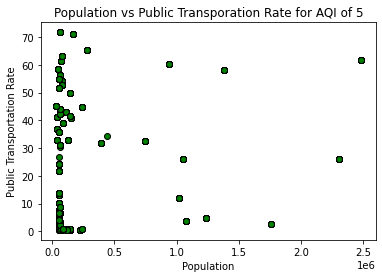

In [28]:
plt.scatter(x, y, facecolors="green", edgecolors="black")

plt.xlabel("Population")
plt.ylabel("Public Transportation Rate")
plt.title("Population vs Public Transporation Rate for AQI of 5")
plt.show()

In [47]:
city_df = high_aqi.groupby(["City"])
population = city_df["Population"].mean()
aqi = city_df["aqi"].mean()

city_population_df = pd.DataFrame({"Population": population, "AQI" : aqi})

city_population_df

,Population,AQI
City,,
Annandale,59872.0,5.0
Artesia,50069.0,5.0
Avondale,76557.0,5.0
Blaine,54315.0,5.0
Boston,442696.0,5.0
...,...,...
West Springfield,57583.0,5.0
Whitehall,59127.0,5.0
Willowbrook,54764.0,5.0


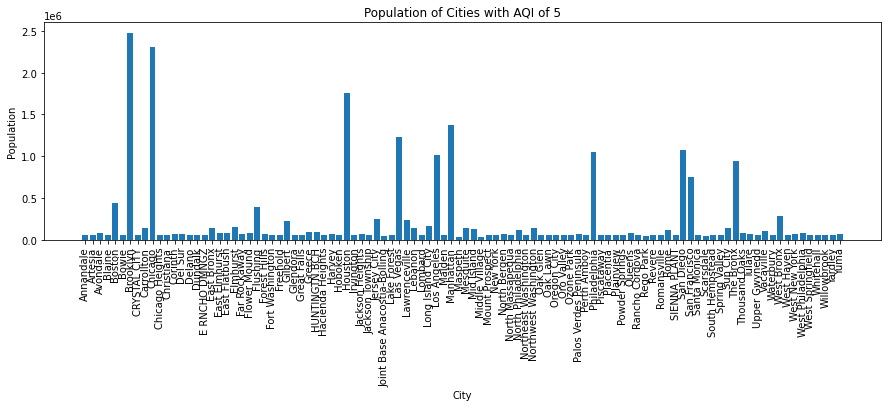

In [63]:
city = city_population_df.index
population = city_population_df["Population"]
plt.figure(figsize=(15, 4))
plt.xticks(rotation=90)
plt.bar(city, population)
plt.xlabel("City")
plt.ylabel("Population")
plt.title("Population of Cities with AQI of 5")
plt.show()

In [59]:
city

Index(['Annandale', 'Artesia', 'Avondale', 'Blaine', 'Boston', 'Bowie',
       'Brooklyn', 'CRYSTAL CITY', 'Carrollton', 'Chicago',
       ...
       'Waterbury', 'West Bronx', 'West Haven', 'West New York',
       'West Philadelphia', 'West Springfield', 'Whitehall', 'Willowbrook',
       'Yardley', 'Yuma'],
      dtype='object', name='City', length=102)